# GEOS 518: Jupyter Notebook Assignment #3: Auto Regressive Moving Average Models

## Taylor Dudunake
Due: 03/19/18

** In this Jupyter Notebook, I will complete the following tasks for discharge data at Middle Fork Boise River near Twin Springs (USGS 13184500): **
1. Load your dataset that you've been using in previous notebooks
2. Split your dataset into a training and test dataset
3. Fit the parameters of the following models to your training dataset:
    * AR(2)
    * ARMA(2,2)
4. Using the test portion of the dataset, compare the observations, AR(2), and ARMA(2,2) predictions for the following lead times:
    * 1 time period ahead
    * 3 time periods ahead
    * 5 time periods ahead
5. Characterize on the accuracy of the forecasts for each lead time and model
6. Comment on and contrast modeling approaches

## Preliminary Tasks: loading libraries
This cell imports necessary libraries to perform tasks in this Jupyter Notebook. The statsmodel library is especially important when estimating parameters

In [1]:
import pandas as pd # Required for data management tasks

import numpy as np # Required for computation tasks useful for this analysis

import matplotlib.pyplot as plt # Required for all things plotting

from pandas.plotting import autocorrelation_plot # Generates an autocorrelation plot

import statsmodels.tsa.api as sm # Required for parameter estimation

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Task 1. Load your dataset that you've been using in previous notebooks
These cells import discharge data from .pkl file previously generated. It's important to view and inspect the data to ensure everything is properly formatted. In this case, the dates are properly formatted in the heading "SerDates". For the following tasks, I also need to describe each data entry by its water year which can be seen in the second block of code.

In [2]:
# Load the MF Boise discharge dataset
df = pd.read_pickle('MFBoiseDischarge_WY2001-2017.pkl')
Q = df['Q (cms)'].values # sets discharge data in dataframe to a variable
day_num = np.arange(0,np.size(Q),1)

In [3]:
# These lines of code assign a water year for each point in the time series.
WY = np.zeros(len(df['Y'].index))
WY[df['M'].values < 10] = df['Y'].values[df['M'].values < 10]
WY[df['M'].values >= 10] = df['Y'].values[df['M'].values >= 10] + 1
df['WY'] = WY.astype(int)

qrows = np.concatenate([np.arange(0,10,1),np.arange(-11,-1,1)])
df.iloc[qrows,:]

,Y,M,D,Q (cms),SerDates,WY
0,2000,10,1,8.694,2000-10-01,2001
1,2000,10,2,9.062,2000-10-02,2001
2,2000,10,3,8.807,2000-10-03,2001
3,2000,10,4,8.779,2000-10-04,2001
4,2000,10,5,8.750,2000-10-05,2001
5,2000,10,6,8.779,2000-10-06,2001
6,2000,10,7,8.779,2000-10-07,2001
7,2000,10,8,8.722,2000-10-08,2001
8,2000,10,9,8.665,2000-10-09,2001
9,2000,10,10,8.835,2000-10-10,2001


## Task 2. Split your dataset into a training and test dataset
This block of code splits the time series data into a training and test portion of dataset. The training dataset is used to estimate the parameters of the models. The test dataset is used to test the models which can then be seen in task 4.

In [4]:
# I segment the whole dataframe into a training dataset (everything that's not Water Year 2015) and a test dataset (everything that is Water Year 2015).
# != means does not equal, == means equals
df_train = df[df.WY != 2014]
df_test  = df[df.WY == 2014]

# Sets discharge data in dataframe to a variable
Qt = pd.Series(df_train['Q (cms)'].values,df_train['SerDates'].values) 
Qtest = df_test['Q (cms)'].values

## Task 3. Fit the parameters of the following models to your training dataset:

### Task 3.1. AR(2)

In [5]:
# Using the statsmodels library to estimate the parameters of the AR(2) model.
Q_AR2_model = sm.AR(Qt).fit(2)
AR2_mu = Q_AR2_model.params[0]
AR2_phi1 = Q_AR2_model.params[1]
AR2_phi2 = Q_AR2_model.params[2]

print('The statsmodel library calculated the parameters to be', AR2_phi1, 'and', AR2_phi2,'. Also, the mu value is', AR2_mu)

The statsmodel library calculated the parameters to be 1.3707781053 and -0.395737906329 . Also, the mu value is 0.828959841344


### Task 3.2. ARMA(2,2)

In [6]:
# Using the statsmodels library to estimate the parameters of the ARMA(2,2) model.
Q_ARMA22_model = sm.ARMA(Qt-np.mean(Qt),(2,2)).fit()
ARMA22_mu = Q_ARMA22_model.params[0]
ARMA22_phi1 = Q_ARMA22_model.params[1]
ARMA22_phi2 = Q_ARMA22_model.params[2]
ARMA22_theta1 = Q_ARMA22_model.params[3]
ARMA22_theta2 = Q_ARMA22_model.params[4]

print('The statsmodel library calculated the parameters to be:', ARMA22_phi1,',', ARMA22_phi2,',',
      ARMA22_theta1,', and', ARMA22_theta2,'. Also, the mu value is', ARMA22_mu,'.') 

The statsmodel library calculated the parameters to be: 1.84332207325 , -0.845521165178 , -0.445009704606 , and -0.417521059417 . Also, the mu value is -0.445381108097 .


## Task 4. Using the test portion of the dataset, compare the observations, AR(2), and ARMA(2,2) predictions for the following lead times:

USE NOISE FROM AR(2) in Assignment 2

In [7]:
noise_std = 3.75849807212

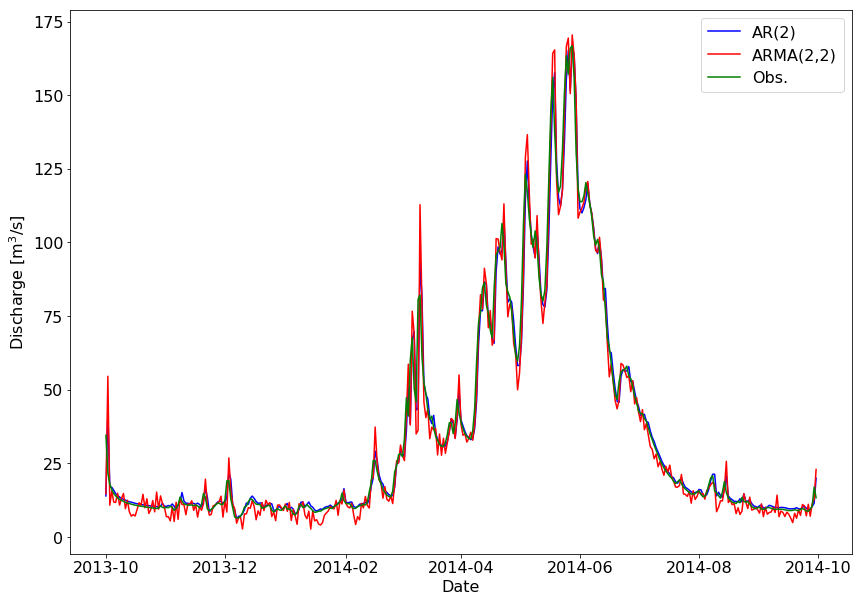

In [8]:
# 0 lead time
Qtrain = df_train['Q (cms)'].values
Qtrain = Qtrain.reshape(Qtrain.size,1)

Qtest  = df_test['Q (cms)'].values
Qtest  = Qtest.reshape(Qtest.size,1)
DatesTest = df_test['SerDates'].values

Qttm1 = np.concatenate([Qtrain[-2:-1],Qtest[0:-1]])
Qttm1 = Qttm1.reshape(Qttm1.size,1)

Qttm2 = np.concatenate([Qtrain[-3:-1],Qtest[0:-2]])
Qttm2 = Qttm2.reshape(Qttm2.size,1)

Qttm3 = np.concatenate([Qtrain[-4:-1],Qtest[0:-3]])
Qttm3 = Qttm3.reshape(Qttm3.size,1)

Qttm4 = np.concatenate([Qtrain[-5:-1],Qtest[0:-4]])
Qttm4 = Qttm4.reshape(Qttm4.size,1)

Qttm5 = np.concatenate([Qtrain[-6:-1],Qtest[0:-5]])
Qttm5 = Qttm5.reshape(Qttm5.size,1)

etatm1 = np.random.normal(0.0,noise_std,(len(Qttm1),1))
etatm2 = np.concatenate([np.random.normal(0.0,noise_std,(2,1)),etatm1[0:-2]])
etatm3 = np.concatenate([np.random.normal(0.0,noise_std,(3,1)),etatm2[0:-3]])
etatm4 = np.concatenate([np.random.normal(0.0,noise_std,(4,1)),etatm2[0:-2]])
etatm5 = np.concatenate([np.random.normal(0.0,noise_std,(5,1)),etatm2[0:-2]])


QhatAR2 = AR2_mu + AR2_phi1*Qttm1 + AR2_phi2*Qttm2
QhatARMA22 = ARMA22_mu + ARMA22_phi1*Qttm1 + ARMA22_phi2*Qttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2,'b-')
plt.plot(DatesTest,QhatARMA22,'r-')
plt.plot(DatesTest,Qtest,'g-')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2)','ARMA(2,2)','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

In [9]:
print(np.random.normal(0.0,noise_std,(2,1)))

[[-2.40862866]
 [ 1.0696859 ]]


### Task 4.1. 1 time period ahead

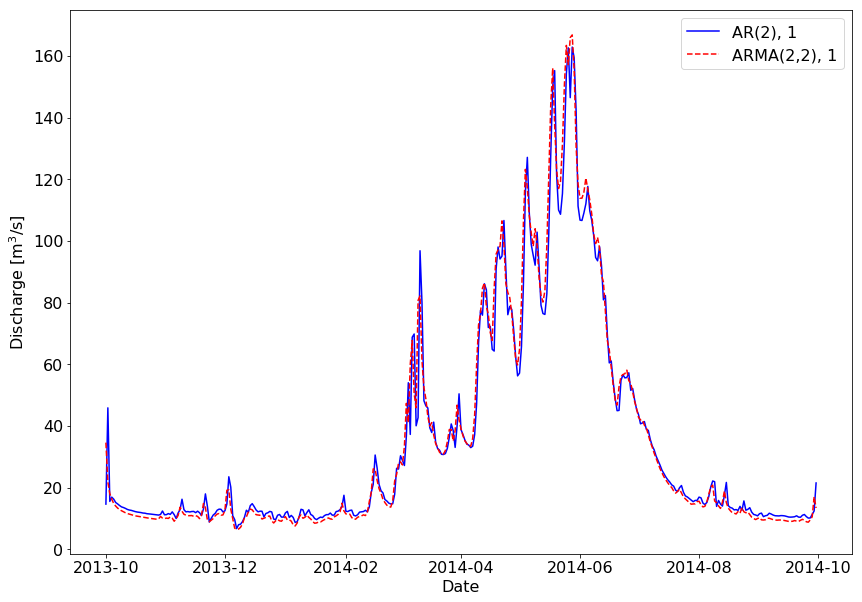

In [10]:
# Calculate AR(2) 2 1 time period ahead
Qt = QhatAR2
QhatAR2_1 = AR2_mu + AR2_phi1*Qt + AR2_phi2*Qttm1

# Calculate ARMA(2,2) 1 time period ahead
#QhatARMA22_1 = ARMA22_mu + ARMA22_phi1*Qttm1 + ARMA22_phi2*Qttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2


plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2_1,'b-')
#plt.plot(DatesTest,QhatARMA22_1,'y-')
plt.plot(DatesTest,Qtest,'r--')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2), 1','ARMA(2,2), 1','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

### Task 4.2. 3 time periods ahead

In [11]:
# Calculate AR(2) 3 time periods ahead
QhatAR2_2 = AR2_mu + AR2_phi1*QhatAR2_1 + AR2_phi2*QhatAR2
QhatAR2_3 = AR2_mu + AR2_phi1*QhatAR2_2 + AR2_phi2*QhatAR2_1

# Calculate ARMA(2,2) 3 time period ahead
#QhatARMA22_3 = ARMA22_mu + ARMA22_phi1*Qttm1 + ARMA22_phi2*Qttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2_3,'b-')
plt.plot(DatesTest,QhatARMA22_3,'y-')
plt.plot(DatesTest,Qtest,'r--')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2), 3','ARMA(2,2), 3','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

NameError: name 'QhatARMA22_3' is not defined

### Task 4.3. 5 time periods ahead

In [12]:
# Calculate AR(2) 5 time periods ahead
QhatAR2_4 = AR2_mu + AR2_phi1*QhatAR2_3 + AR2_phi2*QhatAR2_2
QhatAR2_5 = AR2_mu + AR2_phi1*QhatAR2_4 + AR2_phi2*QhatAR2_3

# Calculate ARMA(2,2) 5 time period ahead
#QhatARMA22_5 = ARMA22_mu + ARMA22_phi1*Qttm1 + ARMA22_phi2*Qttm2 - ARMA22_theta1*etatm1 - ARMA22_theta2*etatm2

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2_5,'b-')
plt.plot(DatesTest,QhatARMA22_5,'y-')
plt.plot(DatesTest,Qtest,'r--')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR(2), 5','ARMA(2,2), 5','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

NameError: name 'QhatARMA22_5' is not defined

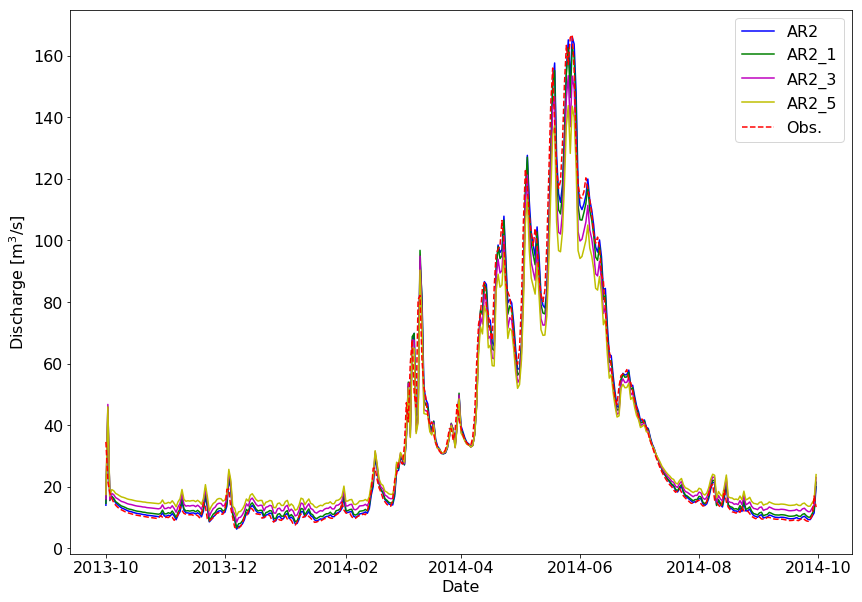

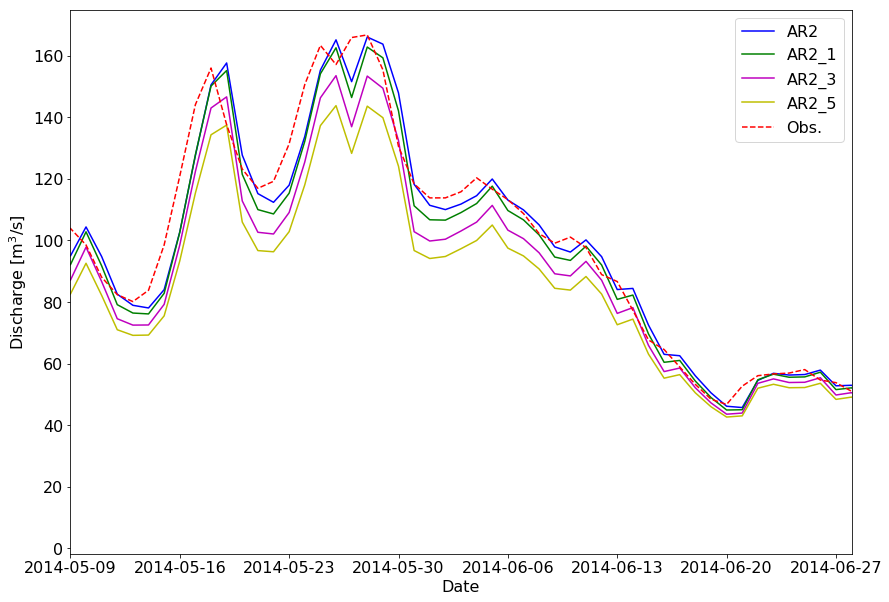

In [14]:
plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2,'b-')
plt.plot(DatesTest,QhatAR2_1,'g-')
plt.plot(DatesTest,QhatAR2_3,'m-')
plt.plot(DatesTest,QhatAR2_5,'y-')
plt.plot(DatesTest,Qtest,'r--')
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR2','AR2_1','AR2_3','AR2_5','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

plt.figure(figsize=(14,10))
plt.plot(DatesTest,QhatAR2,'b-')
plt.plot(DatesTest,QhatAR2_1,'g-')
plt.plot(DatesTest,QhatAR2_3,'m-')
plt.plot(DatesTest,QhatAR2_5,'y-')
plt.plot(DatesTest,Qtest,'r--')
plt.xlim([DatesTest[220],DatesTest[270]])
plt.ylabel('Discharge [m${}^3$/s]',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.legend(('AR2','AR2_1','AR2_3','AR2_5','Obs.'),fontsize=16)
ax = plt.gca()
ax.tick_params('both',labelsize=16)
plt.show()

## Task 5. Characterize on the accuracy of the forecasts for each lead time and model

## Task 6. Comment on and contrast modeling approaches